# Sentiment Analysis Hotel Reviews 

## This dataset is available in Kaggle.com and 

In [2]:
import pandas as pd 
import numpy as np 
import nltk 
#download vader from nltk 
nltk. download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/belamoneta/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
#read data 
df=pd.read_csv('cleaned_hotel_reviews_final.csv')

In [4]:
df.head(10)

,id,address,categories,city,country,name,province,reviews.date,reviews.dateAdded,reviews.rating,reviews.text,reviews.username,review.year,cleaned_reviews
0,1,Riviera San Nicol 11/a,Hotels,Mableton,US,Hotel Russo Palace,GA,2013-09-22 00:00:00+00:00,2016-10-24T00:00:25Z,4.0,pleasant 10 min walk along the sea front to th...,Russ (kent),2013,pleasant 10 min walk along the sea front to th...
1,2,Riviera San Nicol 11/a,Hotels,Mableton,US,Hotel Russo Palace,GA,2015-04-03 00:00:00+00:00,2016-10-24T00:00:25Z,5.0,really lovely hotel. stayed on the very top fl...,A Traveler,2015,really lovely hotel stayed on the very top flo...
2,3,Riviera San Nicol 11/a,Hotels,Mableton,US,Hotel Russo Palace,GA,2013-10-27 00:00:00+00:00,2016-10-24T00:00:25Z,5.0,we stayed here for four nights in october. the...,Julie,2013,we stayed here for four nights in october the ...
3,4,Riviera San Nicol 11/a,Hotels,Mableton,US,Hotel Russo Palace,GA,2015-03-05 00:00:00+00:00,2016-10-24T00:00:25Z,5.0,we stayed here for four nights in october. the...,sungchul,2015,we stayed here for four nights in october the ...
4,5,Riviera San Nicol 11/a,Hotels,Mableton,US,Hotel Russo Palace,GA,2015-04-05 00:00:00+00:00,2016-10-24T00:00:25Z,5.0,we loved staying on the island of lido! you ne...,A Traveler,2015,we loved staying on the island of lido you nee...
5,6,Riviera San Nicol 11/a,Hotels,Mableton,US,Hotel Russo Palace,GA,2014-06-10 00:00:00+00:00,2016-10-24T00:00:25Z,4.0,lovely view out onto the lagoon. excellent vie...,A Traveler,2014,lovely view out onto the lagoon excellent view...
6,7,Riviera San Nicol 11/a,Hotels,Mableton,US,Hotel Russo Palace,GA,2015-08-02 00:00:00+00:00,2016-10-24T00:00:25Z,3.0,it was ok hotel is nice from in and out but ro...,ahsas,2015,it was ok hotel is nice from in and out but ro...
7,8,Riviera San Nicol 11/a,Hotels,Mableton,US,Hotel Russo Palace,GA,2014-04-01 00:00:00+00:00,2016-10-24T00:00:25Z,4.0,the hotel staff was very friendly and helpful....,Mark W,2014,the hotel staff was very friendly and helpful ...
8,9,Riviera San Nicol 11/a,Hotels,Mableton,US,Hotel Russo Palace,GA,2015-06-05 00:00:00+00:00,2016-10-24T00:00:25Z,4.0,"nice hotel , with very friendly staff and help...",Mrs Gardner,2015,nice hotel with very friendly staff and helpf...
9,10,Riviera San Nicol 11/a,Hotels,Mableton,US,Hotel Russo Palace,GA,2015-07-02 00:00:00+00:00,2016-10-24T00:00:25Z,1.0,don't stay here unless you're less than 2 feet...,A Traveler,2015,dont stay here unless youre less than 2 feet t...


In [55]:
#Ensure that the rating does not exceed 5
df['reviews.rating'].unique()

array([4. , 5. , 3. , 1. , 2. , 4.1, 4.9, 4.8, 3.4, 3.1, 3.2, 3.3, 3.8,
       4.2, 4.5, 3.9, 1.3, 4.3, 2.8, 4.4, 4.7, 1.5, 4.6, 3.7, 2.5, 2.9])

In [56]:
#creating an object sentiment intensity analyzer 
sia=SentimentIntensityAnalyzer()

In [7]:
#let's test it out first
#example
text="Bobby is an amazing guy"
sia.polarity_scores(text)

{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'compound': 0.5859}

In [8]:
#example
text='The food delivered was really very bad'
sia.polarity_scores(text)

{'neg': 0.404, 'neu': 0.596, 'pos': 0.0, 'compound': -0.6214}

In [9]:
#creating new column scores using polarity scores function 
df['scores']=df['cleaned_reviews'].apply(lambda body:sia.polarity_scores(str(body)))
df.head()
                

,id,address,categories,city,country,name,province,reviews.date,reviews.dateAdded,reviews.rating,reviews.text,reviews.username,review.year,cleaned_reviews,scores
0,1,Riviera San Nicol 11/a,Hotels,Mableton,US,Hotel Russo Palace,GA,2013-09-22 00:00:00+00:00,2016-10-24T00:00:25Z,4.0,pleasant 10 min walk along the sea front to th...,Russ (kent),2013,pleasant 10 min walk along the sea front to th...,"{'neg': 0.053, 'neu': 0.701, 'pos': 0.247, 'co..."
1,2,Riviera San Nicol 11/a,Hotels,Mableton,US,Hotel Russo Palace,GA,2015-04-03 00:00:00+00:00,2016-10-24T00:00:25Z,5.0,really lovely hotel. stayed on the very top fl...,A Traveler,2015,really lovely hotel stayed on the very top flo...,"{'neg': 0.019, 'neu': 0.507, 'pos': 0.474, 'co..."
2,3,Riviera San Nicol 11/a,Hotels,Mableton,US,Hotel Russo Palace,GA,2013-10-27 00:00:00+00:00,2016-10-24T00:00:25Z,5.0,we stayed here for four nights in october. the...,Julie,2013,we stayed here for four nights in october the ...,"{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'comp..."
3,4,Riviera San Nicol 11/a,Hotels,Mableton,US,Hotel Russo Palace,GA,2015-03-05 00:00:00+00:00,2016-10-24T00:00:25Z,5.0,we stayed here for four nights in october. the...,sungchul,2015,we stayed here for four nights in october the ...,"{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'comp..."
4,5,Riviera San Nicol 11/a,Hotels,Mableton,US,Hotel Russo Palace,GA,2015-04-05 00:00:00+00:00,2016-10-24T00:00:25Z,5.0,we loved staying on the island of lido! you ne...,A Traveler,2015,we loved staying on the island of lido you nee...,"{'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'comp..."


In [57]:
#create compound coloumn
df['compound']=df['scores'].apply(lambda score_dict:score_dict['compound'])
df.head()

,id,address,categories,city,country,name,province,reviews.date,reviews.dateAdded,reviews.rating,reviews.text,reviews.username,review.year,cleaned_reviews,scores,compound,pos,neg,type
0,1,Riviera San Nicol 11/a,Hotels,Mableton,US,Hotel Russo Palace,GA,2013-09-22 00:00:00+00:00,2016-10-24T00:00:25Z,4.0,pleasant 10 min walk along the sea front to the water bus. restaurants etc. hotel was comfortable breakfast was good - quite a variety. room aircon didn't work very well. take mosquito repelant!,Russ (kent),2013,pleasant 10 min walk along the sea front to the water bus restaurants etc hotel was comfortable breakfast was good quite a variety room aircon didnt work very well take mosquito repelant,"{'neg': 0.053, 'neu': 0.701, 'pos': 0.247, 'compound': 0.8161}",0.8161,0.247,0.053,POS
1,2,Riviera San Nicol 11/a,Hotels,Mableton,US,Hotel Russo Palace,GA,2015-04-03 00:00:00+00:00,2016-10-24T00:00:25Z,5.0,really lovely hotel. stayed on the very top floor and were surprised by a jacuzzi bath we didn't know we were getting! staff were friendly and helpful and the included breakfast was great! great location and great value for money. didn't want to leave!,A Traveler,2015,really lovely hotel stayed on the very top floor and were surprised by a jacuzzi bath we didnt know we were getting staff were friendly and helpful and the included breakfast was great great location and great value for money didnt want to leave,"{'neg': 0.019, 'neu': 0.507, 'pos': 0.474, 'compound': 0.9812}",0.9812,0.474,0.019,POS
2,3,Riviera San Nicol 11/a,Hotels,Mableton,US,Hotel Russo Palace,GA,2013-10-27 00:00:00+00:00,2016-10-24T00:00:25Z,5.0,"we stayed here for four nights in october. the hotel staff were welcoming, friendly and helpful. assisted in booking tickets for the opera. the rooms were clean and comfortable- good shower, light and airy rooms with windows you could open wide. beds were comfortable. plenty of choice for breakfast.spa at hotel nearby which we used while we were there.",Julie,2013,we stayed here for four nights in october the hotel staff were welcoming friendly and helpful assisted in booking tickets for the opera the rooms were clean and comfortable good shower light and airy rooms with windows you could open wide beds were comfortable plenty of choice for breakfastspa at hotel nearby which we used while we were there,"{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'compound': 0.9643}",0.9643,0.289,0.000,POS
3,4,Riviera San Nicol 11/a,Hotels,Mableton,US,Hotel Russo Palace,GA,2015-03-05 00:00:00+00:00,2016-10-24T00:00:25Z,5.0,"we stayed here for four nights in october. the hotel staff were welcoming, friendly and helpful. assisted in booking tickets for the opera. the rooms were clean and comfortable- good shower, light and airy rooms with windows you could open wide. beds were comfortable. plenty of choice for breakfast.spa at hotel nearby which we used while we were there.",sungchul,2015,we stayed here for four nights in october the hotel staff were welcoming friendly and helpful assisted in booking tickets for the opera the rooms were clean and comfortable good shower light and airy rooms with windows you could open wide beds were comfortable plenty of choice for breakfastspa at hotel nearby which we used while we were there,"{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'compound': 0.9643}",0.9643,0.289,0.000,POS
4,5,Riviera San Nicol 11/a,Hotels,Mableton,US,Hotel Russo Palace,GA,2015-04-05 00:00:00+00:00,2016-10-24T00:00:25Z,5.0,"we loved staying on the island of lido! you need to take a water is from venice to get there. from the train station, a boat ride takes 45 minutes but has beautiful views along the way. hotel is an easy walk from the boat dock. the room was very clean and the breakfast was plentiful. we would definitely recommend this hotel!",A Traveler,2015,we loved staying on the island of lido you need to take a water is from venice to get there from the train station a boat ride takes 45 minutes but has beautiful views along the way hote

In [11]:
#Create three different columns each for compound scores, positive scores, and negative scores 
df['compound']=df['scores'].apply(lambda score_dict:score_dict['compound'])
df.head()
df['pos']=df['scores'].apply(lambda post_dict:post_dict['pos'])
df.head()
df['neg']=df['scores'].apply(lambda neg_dict:neg_dict['neg'])
df.head()

,id,address,categories,city,country,name,province,reviews.date,reviews.dateAdded,reviews.rating,reviews.text,reviews.username,review.year,cleaned_reviews,scores,compound,pos,neg
0,1,Riviera San Nicol 11/a,Hotels,Mableton,US,Hotel Russo Palace,GA,2013-09-22 00:00:00+00:00,2016-10-24T00:00:25Z,4.0,pleasant 10 min walk along the sea front to th...,Russ (kent),2013,pleasant 10 min walk along the sea front to th...,"{'neg': 0.053, 'neu': 0.701, 'pos': 0.247, 'co...",0.8161,0.247,0.053
1,2,Riviera San Nicol 11/a,Hotels,Mableton,US,Hotel Russo Palace,GA,2015-04-03 00:00:00+00:00,2016-10-24T00:00:25Z,5.0,really lovely hotel. stayed on the very top fl...,A Traveler,2015,really lovely hotel stayed on the very top flo...,"{'neg': 0.019, 'neu': 0.507, 'pos': 0.474, 'co...",0.9812,0.474,0.019
2,3,Riviera San Nicol 11/a,Hotels,Mableton,US,Hotel Russo Palace,GA,2013-10-27 00:00:00+00:00,2016-10-24T00:00:25Z,5.0,we stayed here for four nights in october. the...,Julie,2013,we stayed here for four nights in october the ...,"{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'comp...",0.9643,0.289,0.000
3,4,Riviera San Nicol 11/a,Hotels,Mableton,US,Hotel Russo Palace,GA,2015-03-05 00:00:00+00:00,2016-10-24T00:00:25Z,5.0,we stayed here for four nights in october. the...,sungchul,2015,we stayed here for four nights in october the ...,"{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'comp...",0.9643,0.289,0.000
4,5,Riviera San Nicol 11/a,Hotels,Mableton,US,Hotel Russo Palace,GA,2015-04-05 00:00:00+00:00,2016-10-24T00:00:25Z,5.0,we loved staying on the island of lido! you ne...,A Traveler,2015,we loved staying on the island of lido you nee...,"{'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'comp...",0.9734,0.294,0.000


In [12]:
#column named type that indicates whether the review is pos, neg, or neutral 
df['type']=''
df.loc[df.compound>0, 'type']='POS'
df.loc[df.compound==0, 'type']='NEUTRAL'
df.loc[df.compound<0, 'type']='NEG'
df.head()

,id,address,categories,city,country,name,province,reviews.date,reviews.dateAdded,reviews.rating,reviews.text,reviews.username,review.year,cleaned_reviews,scores,compound,pos,neg,type
0,1,Riviera San Nicol 11/a,Hotels,Mableton,US,Hotel Russo Palace,GA,2013-09-22 00:00:00+00:00,2016-10-24T00:00:25Z,4.0,pleasant 10 min walk along the sea front to th...,Russ (kent),2013,pleasant 10 min walk along the sea front to th...,"{'neg': 0.053, 'neu': 0.701, 'pos': 0.247, 'co...",0.8161,0.247,0.053,POS
1,2,Riviera San Nicol 11/a,Hotels,Mableton,US,Hotel Russo Palace,GA,2015-04-03 00:00:00+00:00,2016-10-24T00:00:25Z,5.0,really lovely hotel. stayed on the very top fl...,A Traveler,2015,really lovely hotel stayed on the very top flo...,"{'neg': 0.019, 'neu': 0.507, 'pos': 0.474, 'co...",0.9812,0.474,0.019,POS
2,3,Riviera San Nicol 11/a,Hotels,Mableton,US,Hotel Russo Palace,GA,2013-10-27 00:00:00+00:00,2016-10-24T00:00:25Z,5.0,we stayed here for four nights in october. the...,Julie,2013,we stayed here for four nights in october the ...,"{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'comp...",0.9643,0.289,0.000,POS
3,4,Riviera San Nicol 11/a,Hotels,Mableton,US,Hotel Russo Palace,GA,2015-03-05 00:00:00+00:00,2016-10-24T00:00:25Z,5.0,we stayed here for four nights in october. the...,sungchul,2015,we stayed here for four nights in october the ...,"{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'comp...",0.9643,0.289,0.000,POS
4,5,Riviera San Nicol 11/a,Hotels,Mableton,US,Hotel Russo Palace,GA,2015-04-05 00:00:00+00:00,2016-10-24T00:00:25Z,5.0,we loved staying on the island of lido! you ne...,A Traveler,2015,we loved staying on the island of lido you nee...,"{'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'comp...",0.9734,0.294,0.000,POS


## Find Sentiment for Hotel Russo Palace

In [13]:
#find sentiment for hotel russo palace
hotel_russo_palace=df[df['name']=='Hotel Russo Palace']['type'].value_counts()
print(hotel_russo_palace)

POS        26
NEG         5
NEUTRAL     1
Name: type, dtype: int64


In [14]:
# Find sentiment for Hotel Russo Palace and print positive reviews
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

positive_reviews_hotel_russo_palace = df[(df['name'] == 'Hotel Russo Palace') & (df['type'] == 'POS')]
positive_reviews_hotel_russo_palace[['cleaned_reviews']]

,cleaned_reviews
0,pleasant 10 min walk along the sea front to the water bus restaurants etc hotel was comfortable breakfast was good quite a variety room aircon didnt work very well take mosquito repelant
1,really lovely hotel stayed on the very top floor and were surprised by a jacuzzi bath we didnt know we were getting staff were friendly and helpful and the included breakfast was great great location and great value for money didnt want to leave
2,we stayed here for four nights in october the hotel staff were welcoming friendly and helpful assisted in booking tickets for the opera the rooms were clean and comfortable good shower light and airy rooms with windows you could open wide beds were comfortable plenty of choice for breakfastspa at hotel nearby which we used while we were there
3,we stayed here for four nights in october the hotel staff were welcoming friendly and helpful assisted in booking tickets for the opera the rooms were clean and comfortable good shower light and airy rooms with windows you could open wide beds were comfortable plenty of choice for breakfastspa at hotel nearby which we used while we were there
4,we loved staying on the island of lido you need to take a water is from venice to get there from the train station a boat ride takes 45 minutes but has beautiful views along the way hotel is an easy walk from the boat dock the room was very clean and the breakfast was plentiful we would definitely recommend this hotel
5,lovely view out onto the lagoon excellent view staff were welcoming and helpful
6,it was ok hotel is nice from in and out but room was small we paid for double bed bat they atteched 2 single bed
7,the hotel staff was very friendly and helpful the room was clean and comfortable my wife and i had a room with a terrace over looking the waterit was a great view i will look to stay at this hotel my next time in venicevery pleased
8,nice hotel with very friendly staff and helpful great choice for breakfast something for everyone
9,dont stay here unless youre less than 2 feet tall or like sleeping with centipedes our 4th floor room was an attic with a vaulted ceiling that angles down to 3ft the bed is only accessible from one side if you placed your head in the skylight on the other side you might able sit up the bathtub was impractical with broken shower head we moved to the 1st floor the next day and within minutes found a centipede on the wall and15 flies we asked for a broom to get rid of the centipede later in the day the receptionist said she gave us something to control the bugs we never complained about the drain flies so she must have noticed a problem that night we spent 2 hrs catching 6 centipedes in our room 2 came from throw pillows we asked reception for a new room or hotel but there supposedly werent any hotels with open rooms and if we wanted leave we would have to pay for transportation and both hotels the next morning we went to reception to tell them about the bug problem we barely said anything before the woman apologized and said they didnt put the bugs in the room on purpose so we should just go about our day and forget it she added that she often goes on vacation with her children and sometimes things happen so she tries to make the best of everything and not start a war adding a few euros isnt going to make anything go away so we should just go enjoy the day because more we talk the less time we have


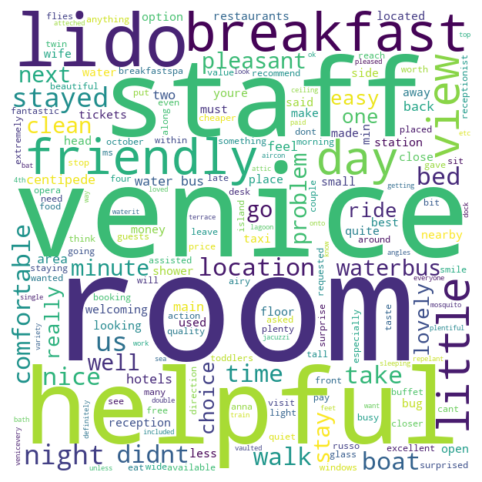

In [15]:
#visualization with wordcloud 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS
import sys, os 
os.chdir(sys.path[0])

# Combine the cleaned reviews into a single text variable
text_positive_hotel_russo_palace = ' '.join(positive_reviews_hotel_russo_palace['cleaned_reviews'])

# Define stopwords
stopwords = set(STOPWORDS)
stopwords.add('hotel') 
stopwords.add('good')
stopwords.add('great') # Add 'hotel' to the list of stopwords

# Create a WordCloud object
wc = WordCloud(
    background_color='white',
    stopwords=stopwords,
    height=600,
    width=600
)

# Generate the word cloud
wordcloud = wc.generate(text_positive_hotel_russo_palace)

# Display the word cloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [16]:
#find sentiment for Hotel Russo Palace and print negative reviews
negative_reviews_hotel_russo_palace=df[(df['name']=='Hotel Russo Palace')&(df['type']=='NEG')]
negative_reviews_hotel_russo_palace[['cleaned_reviews']]

,cleaned_reviews
11,lovely hotel 10 min walk to the water bus stop on lido away from the madness of venice but close enough to be there in less than 20 minutes
17,room was tinybed saggybathroom door didnt work good breakfast and convenient location wouldnt return or recommend
19,no shower but jets in the bathtub and my room was slanted but made it work
21,walls extremely thin you can hear everything excessive hoovering every morning outside bedroom there is a bar but no one to tend it
27,close to venice and decent hotel breakfast was okay with no too much selection but has everything you need


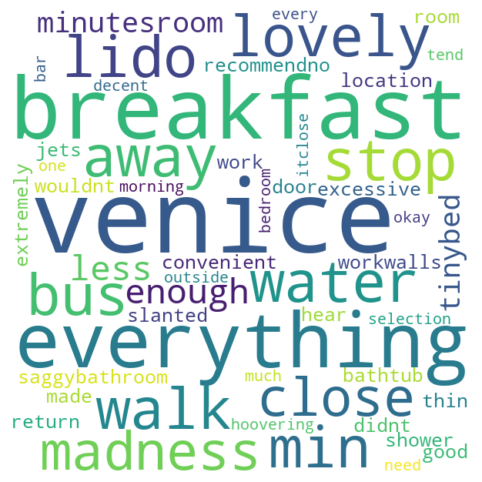

In [17]:
#visualize sentiment 
text_negative_hotel_russo_palace=''.join(negative_reviews_hotel_russo_palace['cleaned_reviews'])
#define stopwords
stopwords=set(STOPWORDS)
stopwords.add('hotel')

#create a wordcloud object 
wc=WordCloud(
background_color='white',
stopwords=stopwords,
height=600,
width=600)

#generate the word cloud
wordcloud=wc.generate(text_negative_hotel_russo_palace)

#display the word cloud 
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()